<a href="https://colab.research.google.com/github/pankajyadav8569/Calculus/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linear Regression

# Yi = MXi + C + (Ephcilon)i, this is the experimental data
import numpy as np
import random
import math
import matplotlib.pyplot as plt

Here we are graphing Linear regression graph for Linear equation,
$$ y_i = mx_i + c + ϵ_i $$
To estimate the value of slope and intercept we will find value of $m$ and $c$ so that the following sum of error(SE) is minimized. Expression for SE is as follows:$$SE = \sum_{i=1}^{n}(y_{i} - m \cdot x_{i} - c)^2$$ where $m$ is slope and $c$ is intercept.To estimate values of $m$ and $c$ use following equations:
$$\frac{∂SE}{∂m} = 0  \quad  and \quad \frac{∂SE}{∂c} = 0$$
Hence calculated values of $m$ and $c$ are:
$$m =\frac{\overline{xy} - \overline{x}⋅\overline{y}}{\overline{x^2} - (\overline{x})^2} \quad \quad and \quad \quad c = \overline{y} - m \cdot \overline{x}$$ Where  $$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}  \quad \quad and \quad \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i} $$

In [ ]:
x = [i for i in range(1,101)] # vary as x axis (xi) taking as a input

Epciloni = []
alp = 10
i = 0
while i<100:
  Epcilon = (random.random() - 0.5)*alp
  Epciloni.append(Epcilon)

  i= i + 1

In [ ]:
# Choose any value of slope(m) and constant(c)
m = 1
C = 2
yi = []# Accumulator to store value of y which vary on y axis
for i in range(100):
  y = m*x[i] + C + Epciloni[i] # y = mxi + c + Epciloni(Error in Experiment)
  yi.append(y)

In [ ]:
# we draw graph y = mx + c
n = 100 
avg_x = sum(x)/n
avg_y = sum(yi)/n
avg_xy = sum([x[i]*yi[i] for i in range(n)])/n
avg_x2 = sum([x[i]*x[i] for i in range(n)])/n

In [ ]:
m = (avg_xy - (avg_x*avg_y))/(avg_x2 - (avg_x)**2)
c = avg_y - m*avg_x
print(m,c)
y = [m*x[i] + c for i in range(n)]

1.004647939604426 1.1306743702991326


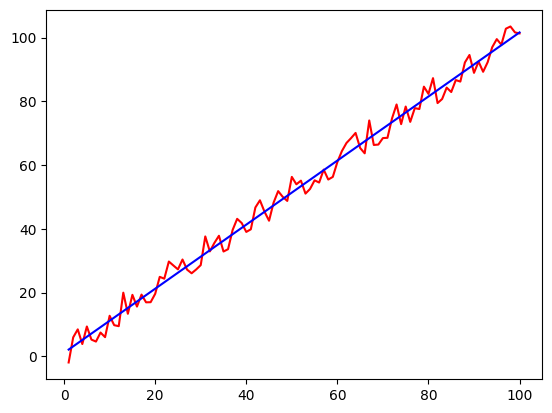

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(name = "first", x = x, y = yi))
# fig.add_trace(go.Scatter(name = "second", x = x, y = y))
# fig.show()
plt.plot(x,yi,color='red')
plt.plot(x,y,color='blue')

# Linear regression for Exponential Function
$$ y_i = β e^{mx_i +ϵ_i}$$
now take log on both side such that it will become linear equation and then we can do it using previous one
$$ log(y_i) = log(β) + mx_i +ϵ_i $$
consider  $$ y_i^{new}= log(y_i), c = log(β) m = γ$$

now apply linear regression method to find $β$ and $γ$.

In [ ]:
# Error for exponential 
Epciloni = []
alp = 0.1 
i = 0
while i < 100:
  Epcilon = (random.random() - 0.5)*alp
  Epciloni.append(Epcilon)

  i= i + 1

In [ ]:
# Yi = bita*e(gama*Xi + Epciloni)
bita = 3
gama = 0.05
y1i = [bita*math.exp(gama*x[i] + Epciloni[i]) for i in range(n)]

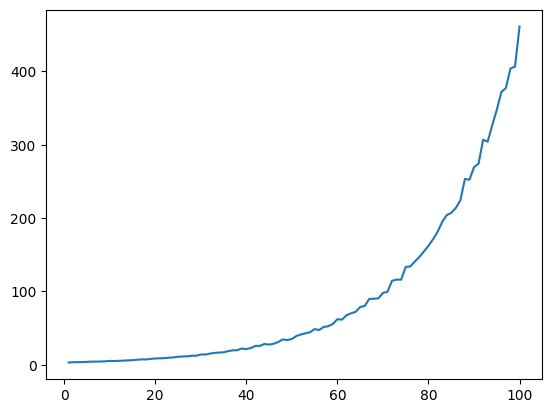

In [ ]:
plt.plot(x,y1i)

In [ ]:
Zi = [math.log(abs(yi[i])) for i in range(n)]
avg_x = sum(x)/n
avg_Z = sum(Zi)/n
avg_xZ = sum([x[i]*Zi[i] for i in range(n)])/n
avg_x2 = sum([x[i]*x[i] for i in range(n)])/n

In [ ]:
m = (avg_xZ - (avg_x*avg_Z))/(avg_x2 - (avg_x)**2)
c = avg_Z - m*avg_x
bita = math.exp(c)
gama = m
y2i = [bita*math.exp(gama*x[i]) for i in range(n)]

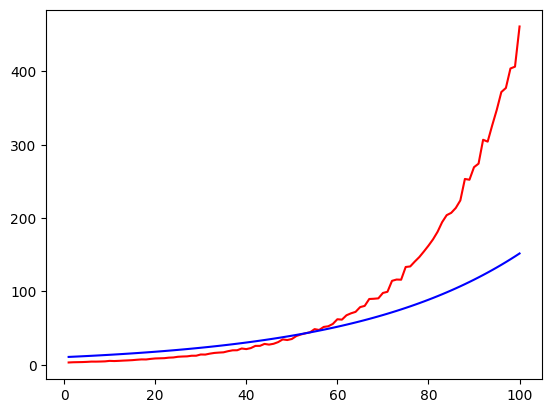

In [ ]:
plt.plot(x,y1i,color='red')
plt.plot(x,y2i,color='blue')

# Here we are graphing linear regression for nth degree polynomial
$$ y_i = m_nx^n + m_{n-1}x^{n-1} + ... + m_1x^1 + m_0x^0 $$
now we will change this polynomial to multidimensional linear equation


treat $x^n$ as nth axis and replace it with $x_n$  as $$ x^n = x_n$$

similrly, treat $x^{n-1}$ as (n-1)th axis and replace it with $x_{n-1}$  as 
$$ x^{n-1} = x_{n-1} $$

and so on ...
then replace $ m_nx_n + m_{n-1}x_{n-1} + ... + m_1x_1 + m_0x_0 $ with MX
so our equation will be $ Y = MX $

then we need to solve it using matrix 

In [ ]:
degree = int(input('degree of polynomial: '))
total_variable = degree
mlist = []        # this is list for coefficint
Xlist = []
power = 0         # starting power with 0
while degree >= 0:
  m = float(input('enter coefficient: '))
  xlist = [i**power for i in range(total_variable+1)]
  Xlist.append(xlist)
  mlist.append(m)
  power += 1
  degree = degree - 1

degree of polynomial: 2
enter coefficient: 1
enter coefficient: 3
enter coefficient: 4


In [ ]:

def Error_ylist(list_2d, list_1d):
  array_2d = np.array(list_2d)
  array_1d = np.array(list_1d)
  mul_array = (array_2d @ array_1d)
  result = [i + (random.random() - 0.5) for i in mul_array]
  return result
print(Error_ylist(Xlist, mlist))

[7.664075050933508, 10.75998290540437, 19.220875484125205]


In [ ]:
matrix = np.array(Xlist)
matrix_inv = np.linalg.inv(matrix)
lst = Error_ylist(Xlist, mlist)
correct_mlist =  matrix_inv @ np.array(lst).reshape(-1, 1)
print(mlist)
     

[1.0, 3.0, 4.0]


In [ ]:
def Correct_ylist(list_2d, list_1d):
  array_2d = np.array(list_2d)
  array_1d = np.array(list_1d)
  return array_2d @ array_1d
print(Correct_ylist(Xlist, correct_mlist))
     

[[ 7.63325602]
 [11.19486993]
 [18.6349765 ]]
